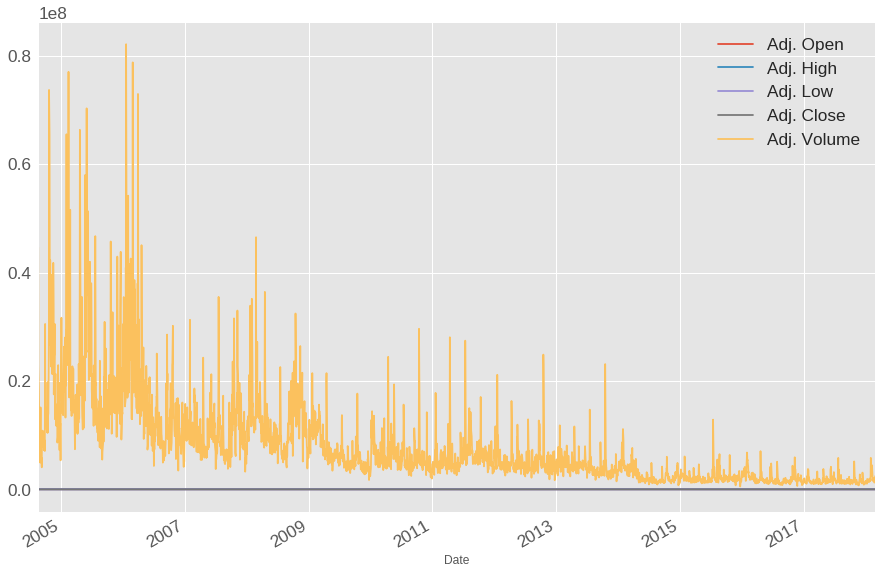

In [13]:
# To really use the Quandl API. Limited usage doesn't require authtoken.

import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

style.use('ggplot')
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df.plot()

In [6]:
oil = df
oil

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Julian
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,2453236.5
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,2453237.5
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,2453240.5
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,2453241.5
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,2453242.5
2004-08-26,52.637487,54.142132,52.492038,54.122070,7094800.0,2453243.5
2004-08-27,54.217364,54.478169,53.008633,53.239345,6211700.0,2453244.5
2004-08-30,52.802998,52.908323,51.162935,51.162935,5196700.0,2453247.5
2004-08-31,51.318415,52.015567,51.238167,51.343492,4917800.0,2453248.5


In [7]:
oil['Julian'] = oil.index.to_julian_date()

import statsmodels.api as sm
oil = sm.add_constant(oil) # Add a constant field for the linear regression


/home/suman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

future_days = []
future_price = []


# Create model

days = oil["Julian"].to_frame()
price = oil["Adj. Open"].to_frame()



/home/suman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suman/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/suman/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/suman/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


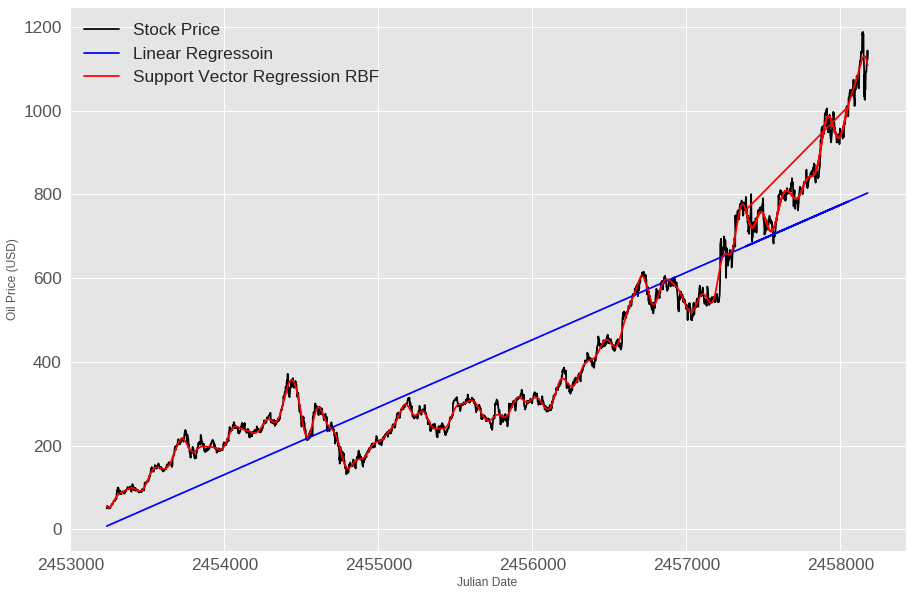

In [14]:
linear = LinearRegression().fit(days, price)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(days, price)


# Extend a number of days for forecasting the future 
last_day = 2457384.5
for i in range(1, 666):
    future_days.append([last_day + i])
    future_price.append(np.nan)

    
# Convert back to float, so, divide every element by 100
linear_pred = list(map(lambda x: float(x), linear.predict(days)))
linear_pred_future = list(map(lambda x: float(x), linear.predict(future_days)))
svr_rbf_pred = list(map(lambda x: float(x), svr_rbf.predict(days)))
svr_rbf_pred_future = list(map(lambda x: float(x), svr_rbf.predict(future_days)))


# Plot data out
plt.hold('on')
plt.plot(days, price, color='black', label='Stock Price')
plt.plot(days, linear_pred, color='blue', label='Linear Regressoin')
plt.plot(future_days, linear_pred_future, color='blue')
plt.plot(days, svr_rbf_pred, color='red', label='Support Vector Regression RBF')
plt.plot(future_days, svr_rbf_pred_future, color='red')
plt.xlabel('Julian Date')
plt.ylabel('Oil Price (USD)')
plt.legend(loc=2)
plt.show()

In [20]:
exponential_model = sklearn.linear_model.Ridge().fit( 
    X=oil[['Julian', 'const']], 
    y=np.log(oil['Adj. Open'])
)

exp_model_df = oil
exp_model_df['Exponential_Model'] = np.exp(exponential_model.predict(oil[['Julian', 'const']]))
exp_model_df['Log_Error_Exponential'] = np.log(oil['Adj. Open'] / oil['Exponential_Model'])


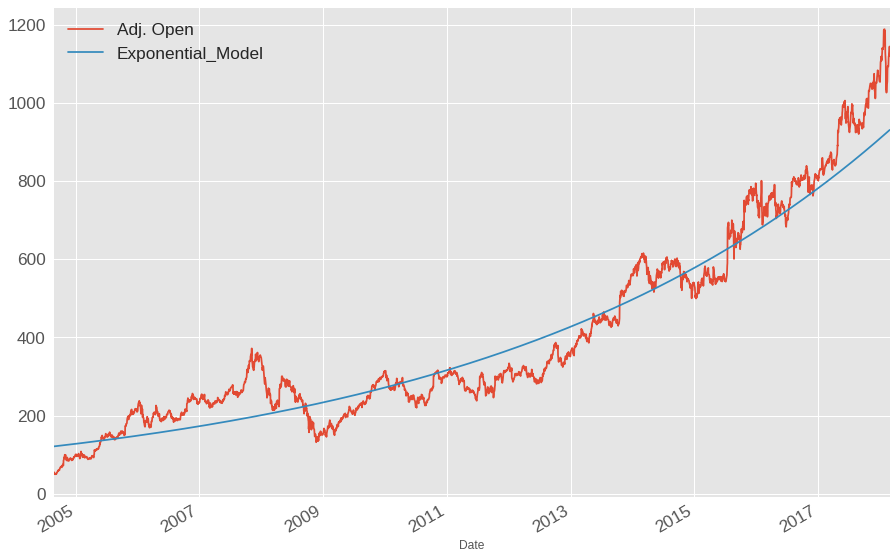

In [21]:
exp_model_df[['Adj. Open', 'Exponential_Model']].plot()

In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/suman/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
/home/suman/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()


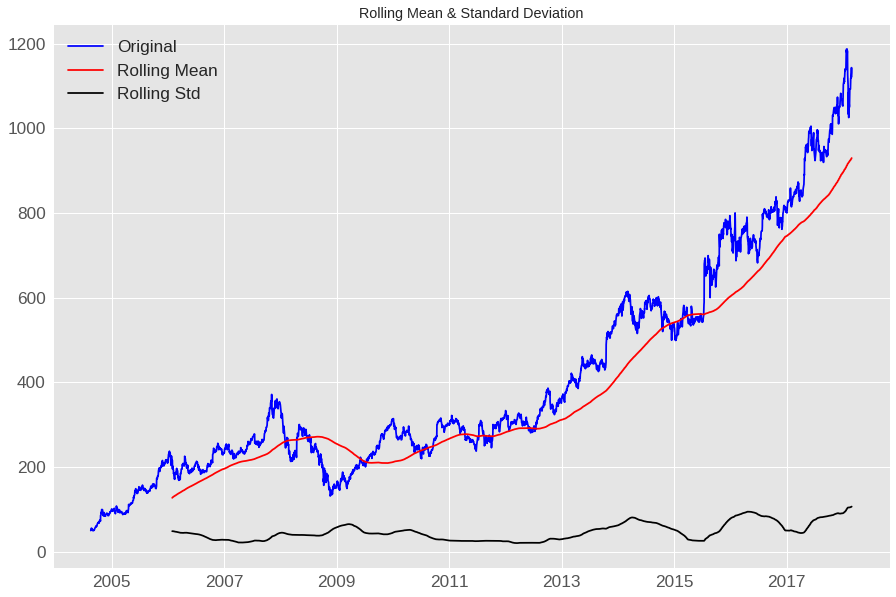

Results of Dickey-Fuller Test:
Test Statistic                    1.325608
p-value                           0.996749
#Lags Used                       27.000000
Number of Observations Used    3377.000000
Critical Value (1%)              -3.432288
Critical Value (5%)              -2.862396
Critical Value (10%)             -2.567226
dtype: float64


In [27]:
test_stationarity(oil['Adj. Open'])

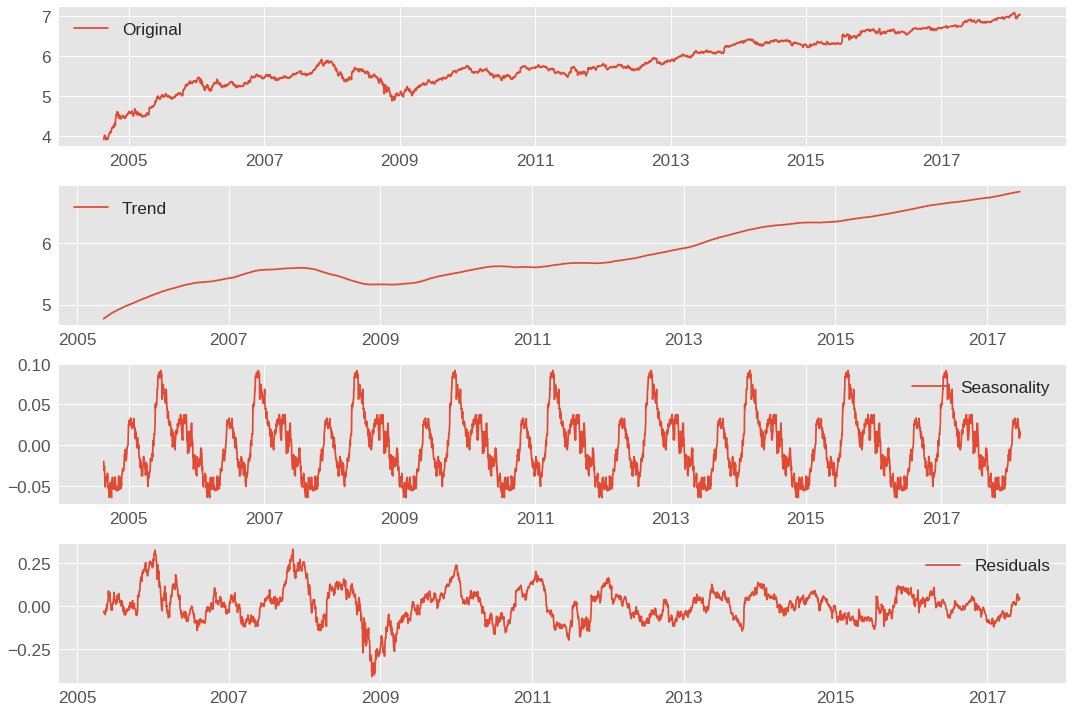

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(oil['Adj. Open'])

decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/suman/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
/home/suman/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()


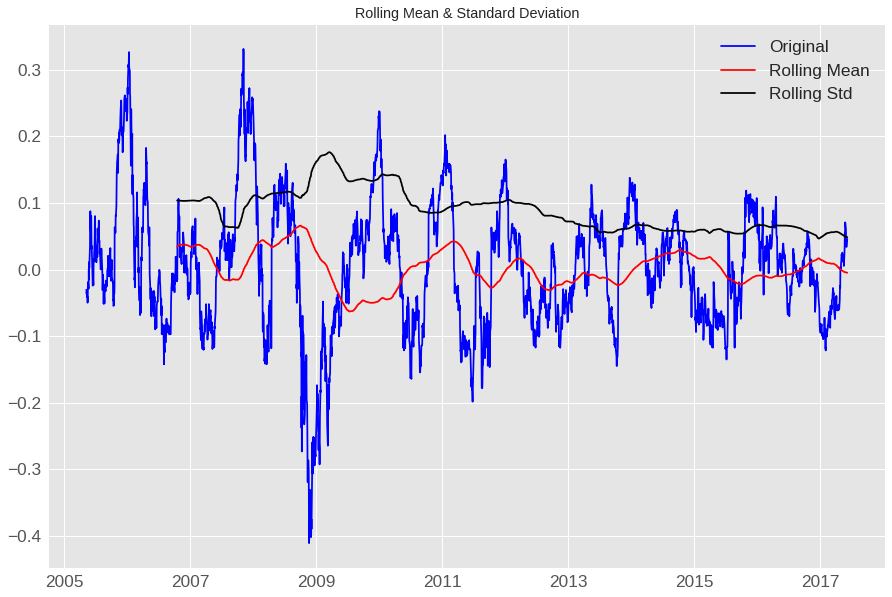

Results of Dickey-Fuller Test:
Test Statistic                   -5.166400
p-value                           0.000010
#Lags Used                       19.000000
Number of Observations Used    3021.000000
Critical Value (1%)              -3.432516
Critical Value (5%)              -2.862497
Critical Value (10%)             -2.567280
dtype: float64


In [30]:


ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)



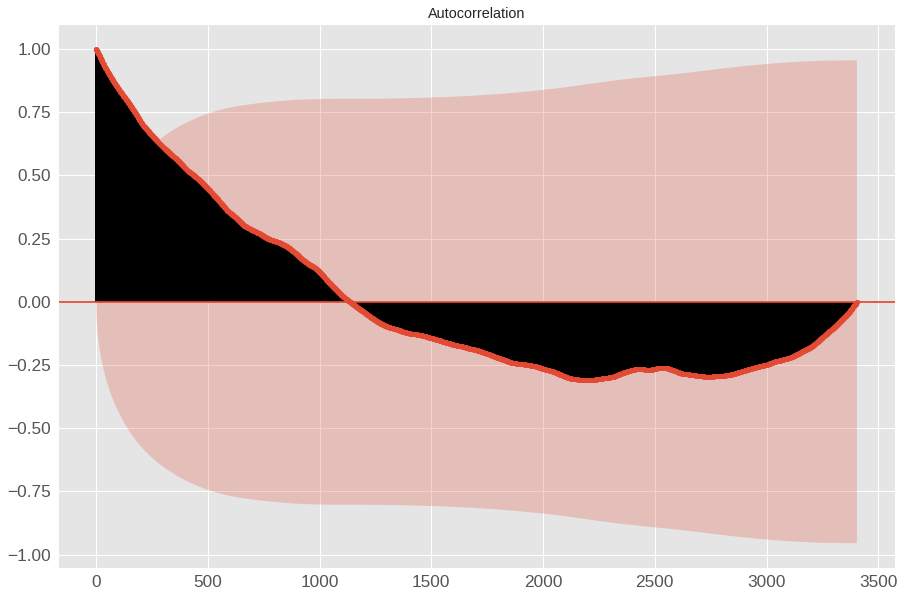

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(oil['Adj. Open'])
plt.show()

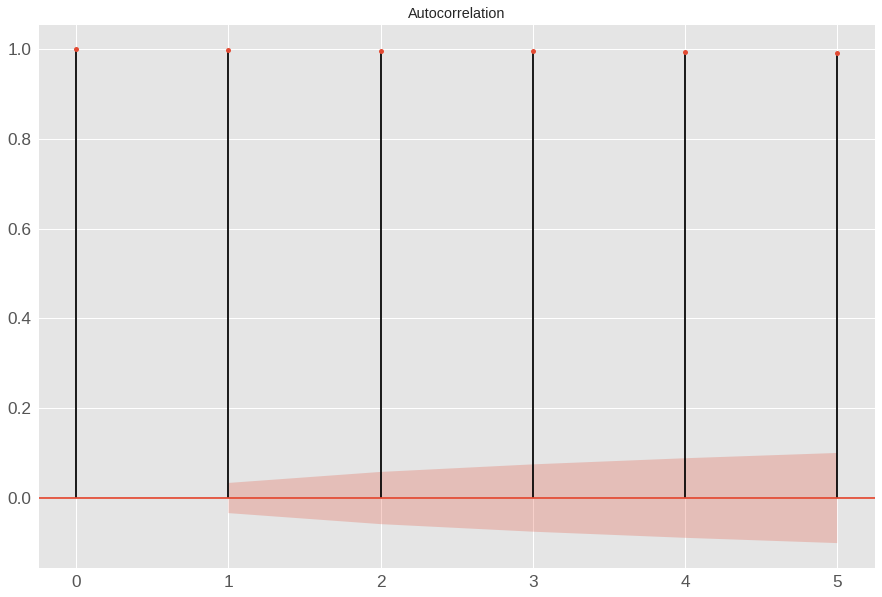

In [34]:
plot_acf(oil['Adj. Open'], lags=5)
plt.show()

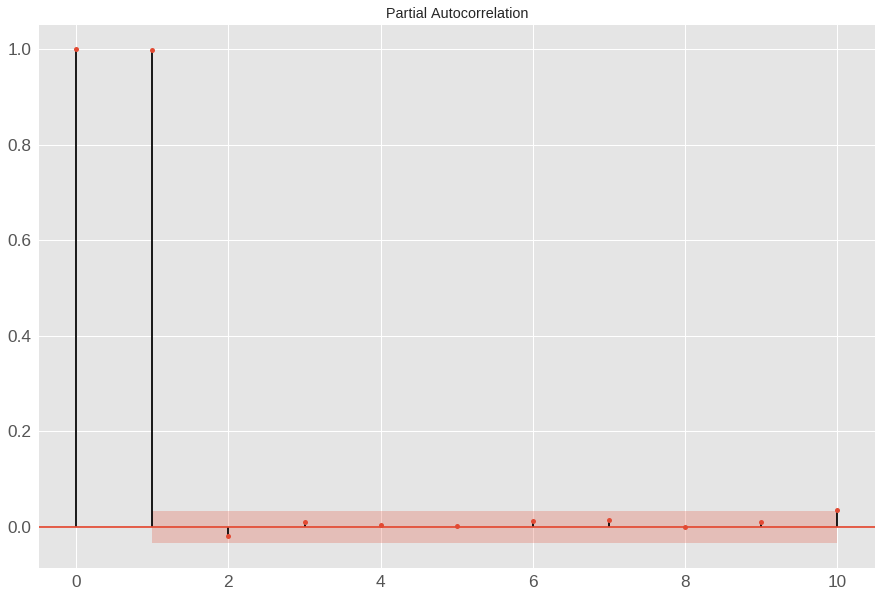

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(oil['Adj. Open'],lags=10)
plt.show()


In [39]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(oil.Adj. Open, order=(2, 2, 10))  
results_ARIMA = model.fit(disp=-1)

SyntaxError: unexpected character after line continuation character (<ipython-input-39-bdad2d0fc340>, line 3)

In [40]:
oil

,const,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Julian,Exponential_Model,Log_Error_Exponential
Date,,,,,,,,,
2004-08-19,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,2453236.5,120.733067,-0.878367
2004-08-20,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,2453237.5,120.782975,-0.868831
2004-08-23,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,2453240.5,120.932821,-0.777925
2004-08-24,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,2453241.5,120.982812,-0.774014
2004-08-25,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,2453242.5,121.032823,-0.834445
2004-08-26,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0,2453243.5,121.082854,-0.833047
2004-08-27,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0,2453244.5,121.132906,-0.803887
2004-08-30,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0,2453247.5,121.283187,-0.831560
2004-08-31,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0,2453248.5,121.333322,-0.860492
